In [1]:
# trainset
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/train_split_Depression_AVEC2017.csv")
df.head()

,Participant_ID,PHQ8_Binary,PHQ8_Score,Gender,PHQ8_NoInterest,PHQ8_Depressed,PHQ8_Sleep,PHQ8_Tired,PHQ8_Appetite,PHQ8_Failure,PHQ8_Concentrating,PHQ8_Moving
0,303,0,0,0,0,0,0.0,0,0,0,0,0
1,304,0,6,0,0,1,1.0,2,2,0,0,0
2,305,0,7,1,0,1,1.0,2,2,1,0,0
3,310,0,4,1,1,1,0.0,0,0,1,1,0
4,312,0,2,1,0,0,1.0,1,0,0,0,0


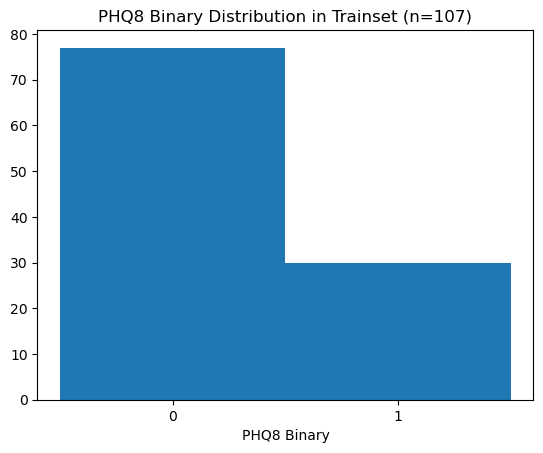

In [36]:
plt.hist(df.PHQ8_Binary, bins=range(3), align='left')
plt.title('PHQ8 Binary Distribution in Trainset (n={})'.format(len(df)))
plt.xlabel('PHQ8 Binary')
plt.xticks([0, 1])
plt.show()

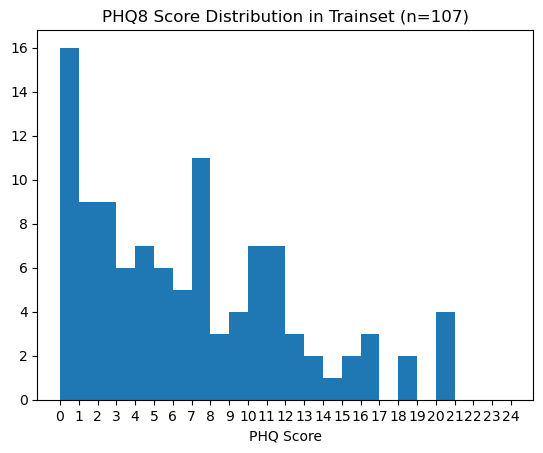

In [29]:
plt.hist(df.PHQ8_Score, bins=range(25))
plt.title('PHQ8 Score Distribution in Trainset (n={})'.format(len(df)))
plt.xlabel('PHQ Score')
plt.xticks(range(0, 25))
plt.show()

In [17]:
df1 = pd.read_csv("../data/dev_split_Depression_AVEC2017.csv")
df1.head()

,Participant_ID,PHQ8_Binary,PHQ8_Score,Gender,PHQ8_NoInterest,PHQ8_Depressed,PHQ8_Sleep,PHQ8_Tired,PHQ8_Appetite,PHQ8_Failure,PHQ8_Concentrating,PHQ8_Moving
0,302,0,4,1,1,1,0,1,0,1,0,0
1,307,0,4,0,0,1,0,1,0,2,0,0
2,331,0,8,1,1,1,1,1,1,1,1,1
3,335,1,12,0,1,1,3,2,3,1,1,0
4,346,1,23,0,2,3,3,3,3,3,3,3


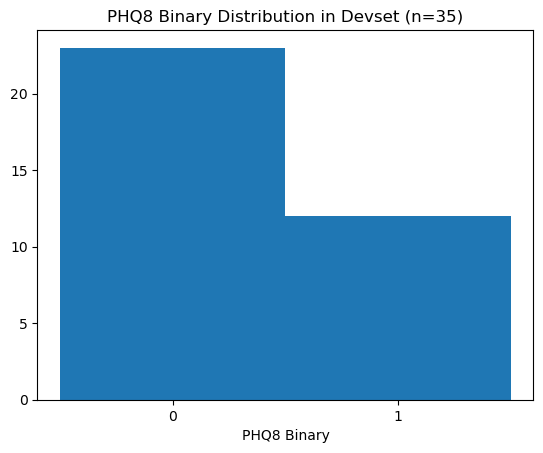

In [35]:
plt.hist(df1.PHQ8_Binary, bins=range(3), align='left')
plt.title('PHQ8 Binary Distribution in Devset (n={})'.format(len(df1)))
plt.xlabel('PHQ8 Binary')
plt.xticks([0, 1])
plt.show()

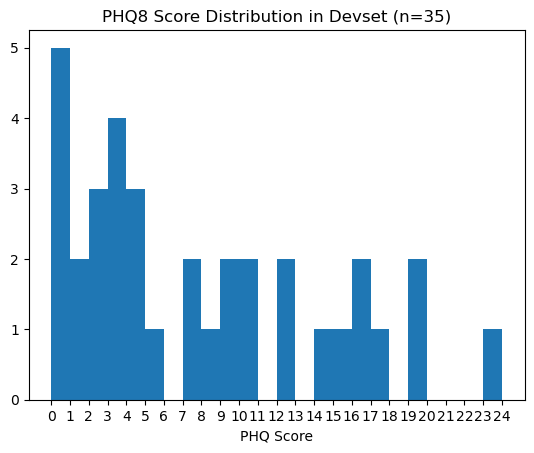

In [30]:
plt.hist(df1.PHQ8_Score, bins=range(25))
plt.title('PHQ8 Score Distribution in Devset (n={})'.format(len(df1)))
plt.xlabel('PHQ Score')
plt.xticks(range(0, 25))
plt.show()

6.420560747663552
7.428571428571429


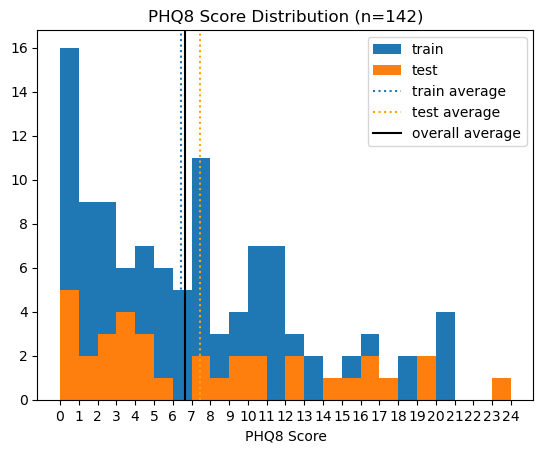

In [52]:
y_train = df.PHQ8_Score
y_test = df1.PHQ8_Score

y_train_avg = sum(y_train)/len(y_train)
y_test_avg = sum(y_test)/len(y_test)

y_overall_avg = (sum(y_train) + sum(y_test)) / (len(y_train)+ len(y_test))

print(y_train_avg)
print(y_test_avg)


plt.hist(y_train, bins=range(25), label = "train")
plt.hist(y_test, bins=range(25), label = "test")
plt.axvline(x = y_train_avg, linestyle = "dotted", label = "train average")
plt.axvline(x = y_test_avg, linestyle = "dotted", color = "orange", label = "test average")
plt.axvline(x = y_overall_avg, color = "black", label = "overall average")


plt.title('PHQ8 Score Distribution (n={})'.format(len(df)+len(df1)))
plt.xlabel('PHQ8 Score')
plt.xticks(range(25))
plt.legend()
plt.savefig("histogram_plot")
plt.show()

In [43]:
def depressed_count(list):
  normal = 0
  depressed = 0 
  output = []
  for l in list: 
    if l == 0:
      normal += 1
    else:
      depressed += 1
    
  output.append(normal)
  output.append(depressed)

  return output 

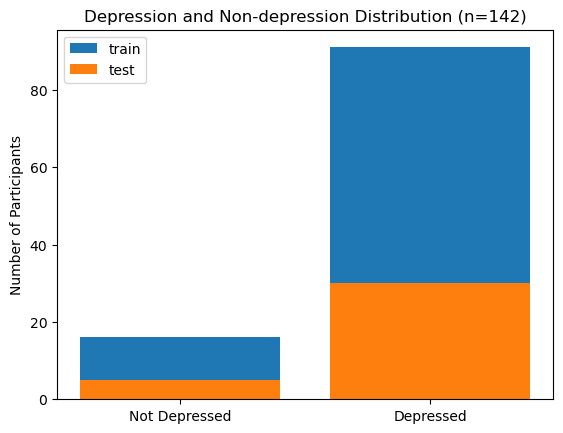

In [47]:
x_labels = ["Not Depressed", "Depressed"]

y_train_count = depressed_count(y_train)
y_test_count = depressed_count(y_test)
plt.bar(x_labels, y_train_count, align='center', label = "train")
plt.bar(x_labels, y_test_count, align='center', label = "test")

plt.title('Depression and Non-depression Distribution (n={})'.format(len(df)+len(df1)))
plt.ylabel('Number of Participants')
# plt.xlabel('Presence of depression')
plt.xticks(x_labels)
plt.legend()
plt.savefig('binary_bar3.png')

plt.show()